# Problem statement of crop recommendation
The problem statement for crop recommendation is to develop a model that can recommend the best crop to be grown in a particular region based on various factors such as soil type, climate, rainfall, and other environmental factors.

The objective of the analysis is to help farmers make informed decisions about crop selection and maximize crop yield and profitability. By recommending the most suitable crop for a particular region, the model can help farmers optimize their agricultural production, reduce wastage and improve the sustainability of their agricultural practices.

To develop a crop recommendation model, data on various environmental factors such as temperature, rainfall, soil type, pH, humidity, and other environmental factors need to be collected for different regions. This data can be used to train a machine learning model that can recommend the best crop to be grown in a particular region based on these factors



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv("/content/Crop_recommendation.csv")

In [3]:
data1.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [4]:
data1.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data1.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
data1.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
data1.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
X=data1.drop(['label'],axis=1)
y=data1['label']

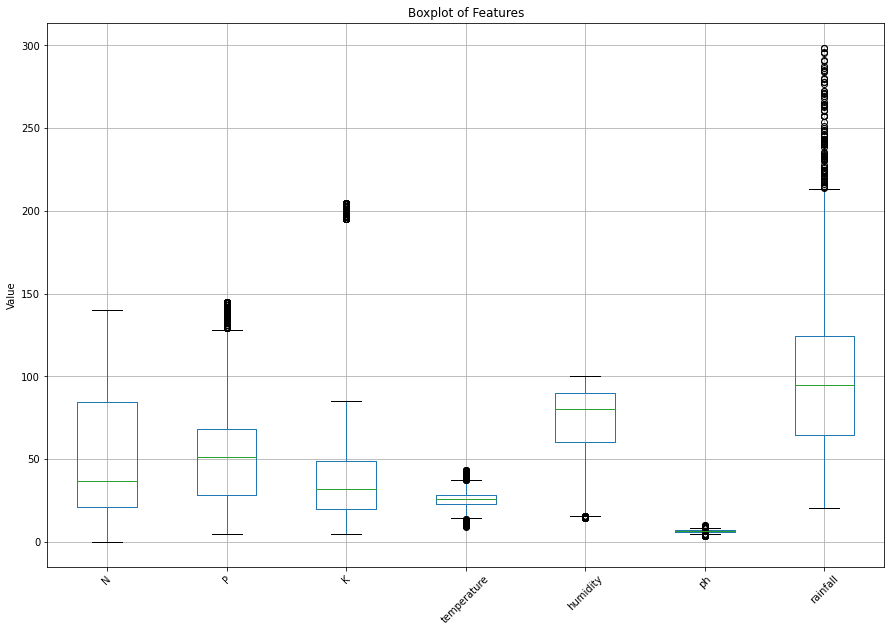

In [10]:
fig, ax = plt.subplots(figsize=(15,10))
X.boxplot(ax=ax)

# Set the title and labels for the boxplot
ax.set_title('Boxplot of Features')
ax.set_ylabel('Value')
ax.set_xticklabels(X.columns, rotation=45)

# Show the boxplot
plt.show()

<AxesSubplot:xlabel='ph', ylabel='Count'>

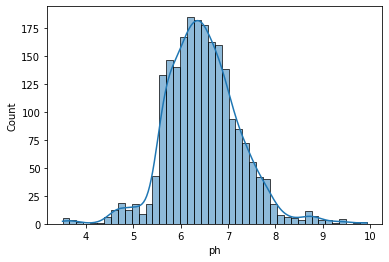

In [11]:
sns.histplot(data=data1, x='ph', kde=True)

<AxesSubplot:xlabel='temperature', ylabel='Count'>

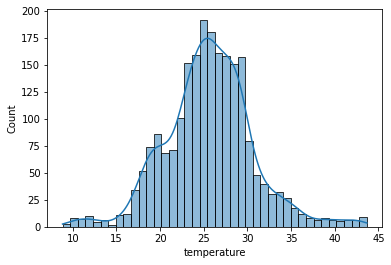

In [12]:
sns.histplot(data=data1, x='temperature', kde=True)

<AxesSubplot:xlabel='humidity', ylabel='Count'>

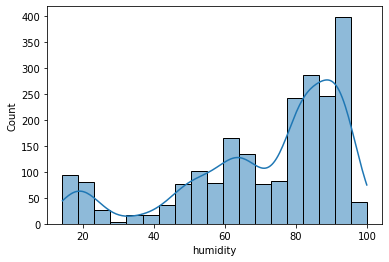

In [13]:
sns.histplot(data=data1, x='humidity', kde=True)

In [14]:
data1['label'].value_counts(normalize=True)*100

rice           4.545455
maize          4.545455
jute           4.545455
cotton         4.545455
coconut        4.545455
papaya         4.545455
orange         4.545455
apple          4.545455
muskmelon      4.545455
watermelon     4.545455
grapes         4.545455
mango          4.545455
banana         4.545455
pomegranate    4.545455
lentil         4.545455
blackgram      4.545455
mungbean       4.545455
mothbeans      4.545455
pigeonpeas     4.545455
kidneybeans    4.545455
chickpea       4.545455
coffee         4.545455
Name: label, dtype: float64

<AxesSubplot:title={'center':'Correlation between features'}>

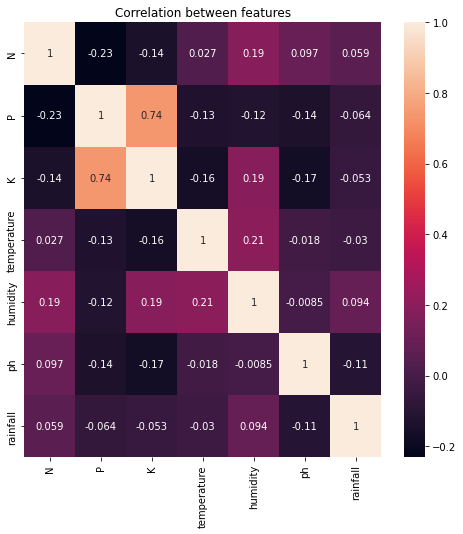

In [15]:
plt.figure(figsize=(8,8))
plt.title("Correlation between features")
corr = data1.corr()
sns.heatmap(corr, annot=True)

In [16]:
data1['label'] = data1['label'].astype('category').cat.codes

In [17]:
data1.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [18]:
train = data1.sample(frac=0.8,random_state=123)
test = data1.drop(train.index)

In [19]:
print(train.shape)
print(test.shape)

(1760, 8)
(440, 8)


In [20]:
X_train=train.drop(['label'],axis=1)
y_train=train['label']
X_test=test.drop(['label'],axis=1)
y_test=test['label']

In [29]:
X_train

,N,P,K,temperature,humidity,ph,rainfall
809,8,58,17,28.752731,69.156401,7.286050,35.154262
403,27,57,24,27.335349,43.357960,6.091863,142.330368
304,2,61,20,22.139747,23.022511,5.955617,76.641283
1743,59,62,52,43.675493,93.108872,6.608668,103.823566
866,36,67,20,20.390783,60.475289,6.924042,53.315086
...,...,...,...,...,...,...,...
1544,2,123,205,22.366293,90.785725,5.739652,124.983162
509,11,53,24,28.523967,55.772644,7.393899,61.329356
2095,87,44,43,23.874845,86.792613,6.718725,177.514731
1073,111,88,55,29.447954,78.349715,5.505394,96.450426


In [48]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [49]:
X_test

array([[ 85.        ,  58.        ,  41.        , ...,  80.31964408,
          7.03809636, 226.6555374 ],
       [ 74.        ,  35.        ,  40.        , ...,  80.15836264,
          6.9804009 , 242.8640342 ],
       [ 94.        ,  50.        ,  37.        , ...,  80.66385045,
          6.94801983, 209.5869708 ],
       ...,
       [ 99.        ,  16.        ,  30.        , ...,  65.44340921,
          6.39279165, 186.1728203 ],
       [ 99.        ,  15.        ,  27.        , ...,  56.63636248,
          6.08692236, 127.92461   ],
       [104.        ,  18.        ,  30.        , ...,  60.39647474,
          6.77983261, 140.9370415 ]])

In [50]:
class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X_train, y_train):
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X_test):
        y_pred = []
        for row in X_test:
            dist = np.sqrt(np.sum((row - self.X_train)**2, axis=1))
            idx = np.argsort(dist)[:self.k]
            labels = self.y_train[idx]
            counts = np.bincount(labels)
            y_pred.append(np.argmax(counts))
        return y_pred

In [51]:
knn = KNN(k=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [53]:
accuracy = sum(y_pred == y_test)/len(y_test)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.97
